Licensed under the MIT License.

Copyright (c) 2021-2031. All rights reserved.

# Greykite Outliers Detection

* Greykite uses z-score to detect outliers: https://linkedin.github.io/greykite/docs/0.1.0/html/pages/autodoc/doc.html#module-greykite.sklearn.transform.zscore_outlier_transformer
  * `z-score = (x - mean) / std`
* `z_cutoff` should be a positive value: https://github.com/linkedin/greykite/blob/master/greykite/sklearn/transform/zscore_outlier_transformer.py#L118
  * Normally when abs(z-szore) >= 3, we can consider the record as an outlier

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly

from greykite.sklearn.transform.zscore_outlier_transformer import ZscoreOutlierTransformer

In [73]:
def plot_ts(ts, title):
    plt.figure(figsize=(20,3))
    for col in ts.columns:
        fig = plt.plot(ts[col], label=col)
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    
def plot_ts_outliers(ts, outliers, title):
    plt.figure(figsize=(20,3))
    fig = plt.plot(ts, label='original ts', color='blue')
    plt.scatter(x=outliers.index, y=outliers, c='red', marker='*')
    plt.legend(loc='best')
    
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [29]:
ts_df = pd.read_pickle('../../crystal_ball/data_collector/structured_data/sales_ts.pkl')
ts_df = ts_df.iloc[ts_df.index < '2015-03-01']
print(ts_df.shape)

ts_df.head()

(789, 1)


,Daily_Sales
Date,
2013-01-01,58165
2013-01-02,4822042
2013-01-03,4415571
2013-01-04,4587035
2013-01-05,4078281


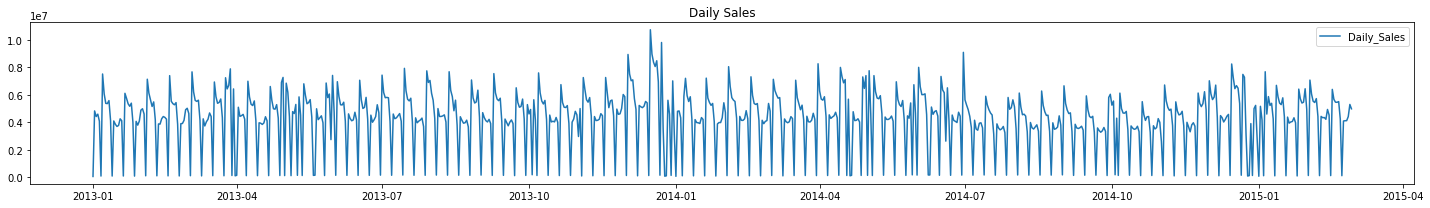

In [30]:
plot_ts(ts_df, title='Daily Sales')

In [62]:
gk_outlier_transformer = ZscoreOutlierTransformer(use_fit_baseline=True, z_cutoff=3)
transformed_ts_df = gk_outlier_transformer.fit_transform(X=ts_df)
transformed_ts_df.head()

,Daily_Sales
Date,
2013-01-01,58165.0
2013-01-02,4822042.0
2013-01-03,4415571.0
2013-01-04,4587035.0
2013-01-05,4078281.0


In [64]:
print(ts_df.isnull().sum())
print()
print(transformed_ts_df.isnull().sum())

Daily_Sales    0
dtype: int64

Daily_Sales    1
dtype: int64


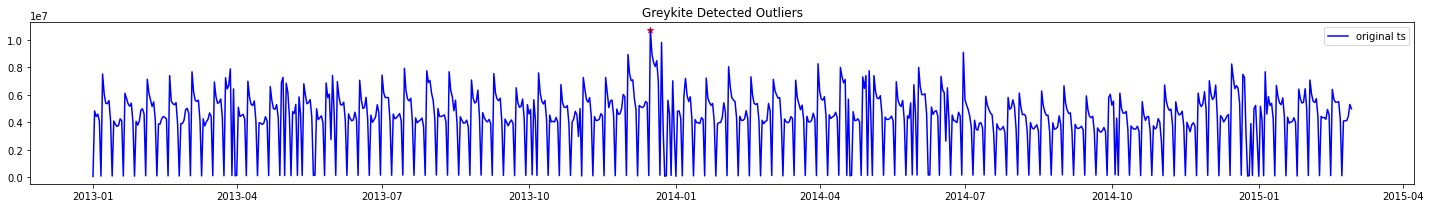

In [74]:
detected_outliers = ts_df.iloc[ts_df.index.isin(transformed_ts_df[transformed_ts_df['Daily_Sales'].isnull()].index)]

plot_ts_outliers(ts_df, detected_outliers, title='Greykite Detected Outliers')